## Script Handle data date, ids, location

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:

data_path = '../data'
file_names = [f'2016_{str(n+1).zfill(2)}.csv' for n in range(12)]
file_names

dfs = []
for i in range(12):
    dtype_spec = None
    if i in [2, 4, 5, 8, 9, 10, 11]:
        dtype_spec = {48: 'str'}
    elif i == 3:
        dtype_spec = {
            0: 'str', 1: 'str', 3: 'str', 4: 'str', 10: 'str', 11: 'str', 13: 'str',
            19: 'str', 20: 'str', 21: 'str', 22: 'str', 30: 'str', 36: 'str', 41: 'str', 48: 'str'
        }
    df_part = pd.read_csv(f'{data_path}/{file_names[i]}', on_bad_lines='skip', dtype=dtype_spec)
    print(f'File {i + 1}: {df_part.shape}')
    dfs.append(df_part)
df = pd.concat(dfs, ignore_index=True)

if 'Unnamed: 64' in df.columns:
    df.drop(columns=['Unnamed: 64'], inplace=True)
if 'UNIQUE_CARRIER' in df.columns:
    df.drop(columns=['UNIQUE_CARRIER'], inplace=True)
df = df.loc[~df['FL_DATE'].str.startswith('5059')]

df.loc[:, 'FL_DATE'] = pd.to_datetime(df['FL_DATE'])

columns_to_drop = [
    'YEAR',
    'QUARTER',
    'MONTH',
    'DAY_OF_MONTH',
    'DAY_OF_WEEK',
    'FL_DATE_year',
    'FL_DATE_quarter',
    'FL_DATE_month',
    'FL_DATE_day_of_month',
    'FL_DATE_day_of_week'
]
existing_drop = [col for col in columns_to_drop if col in df.columns]
if existing_drop:
    df.drop(columns=existing_drop, inplace=True)
    



File 1: (445827, 65)
File 2: (423889, 65)
File 3: (479122, 65)
File 4: (479950, 65)
File 5: (479358, 65)
File 6: (487637, 65)
File 7: (502457, 65)
File 8: (498347, 65)
File 9: (454878, 65)
File 10: (472626, 65)
File 11: (450938, 65)
File 12: (460949, 65)


In [4]:
df[df['FL_NUM'] == '582700-1759']

,FL_DATE,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME
1802953,2016-04-29,20409,B6,N644JB,582700-1759,15.00,1753,1816,4.00,1829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.drop(df[df['FL_NUM'] == '582700-1759'].index, inplace=True)
df['FL_NUM'] = df['FL_NUM'].astype(int)

df['ORIGIN_AIRPORT_ID'] = df['ORIGIN_AIRPORT_ID'].astype(int)
df['ORIGIN_CITY_MARKET_ID'] = df['ORIGIN_CITY_MARKET_ID'].astype(int)
df['ORIGIN_STATE_FIPS'] = df['ORIGIN_STATE_FIPS'].astype(int)

df.drop(df[df['ORIGIN_STATE_NM'] == 'Illinois",1842"'].index, inplace=True)

df['ORIGIN_WAC'] = df['ORIGIN_WAC'].replace('7.00', 7)
df['ORIGIN_WAC'] = df['ORIGIN_WAC'].astype(int)

In [10]:
df['DEST_AIRPORT_ID'] = df['DEST_AIRPORT_ID'].astype(int)
df['DEST_AIRPORT_SEQ_ID'] = df['DEST_AIRPORT_SEQ_ID'].astype(int)
df['DEST_CITY_MARKET_ID'] = df['DEST_CITY_MARKET_ID'].astype(int)

df['DEST_STATE_FIPS'] = df['DEST_STATE_FIPS'].astype(int)

df['DEST_WAC'] = df['DEST_WAC'].astype(int)



In [52]:
df.dtypes

FL_DATE                  datetime64[ns]
AIRLINE_ID                        int64
CARRIER                          object
TAIL_NUM                         object
FL_NUM                            int64
ORIGIN_AIRPORT_ID                 int64
ORIGIN_AIRPORT_SEQ_ID             int64
ORIGIN_CITY_MARKET_ID             int64
ORIGIN                           object
ORIGIN_CITY_NAME                 object
ORIGIN_STATE_ABR                 object
ORIGIN_STATE_FIPS                 int64
ORIGIN_STATE_NM                  object
ORIGIN_WAC                        int64
DEST_AIRPORT_ID                   int64
DEST_AIRPORT_SEQ_ID               int64
DEST_CITY_MARKET_ID               int64
DEST                             object
DEST_CITY_NAME                   object
DEST_STATE_ABR                   object
DEST_STATE_FIPS                   int64
DEST_STATE_NM                    object
DEST_WAC                          int64
CRS_DEP_TIME                      int64
DEP_TIME                          Int64


In [13]:
df.isna().sum()

FL_DATE                        0
AIRLINE_ID                     0
CARRIER                        0
TAIL_NUM                   12750
FL_NUM                         0
ORIGIN_AIRPORT_ID              0
ORIGIN_AIRPORT_SEQ_ID          0
ORIGIN_CITY_MARKET_ID          0
ORIGIN                         0
ORIGIN_CITY_NAME               0
ORIGIN_STATE_ABR               0
ORIGIN_STATE_FIPS              0
ORIGIN_STATE_NM                0
ORIGIN_WAC                     0
DEST_AIRPORT_ID                0
DEST_AIRPORT_SEQ_ID            0
DEST_CITY_MARKET_ID            0
DEST                           0
DEST_CITY_NAME                 0
DEST_STATE_ABR                 0
DEST_STATE_FIPS                0
DEST_STATE_NM                  0
DEST_WAC                       0
CRS_DEP_TIME                   0
DEP_TIME                   63538
DEP_DELAY                  63538
DEP_DELAY_NEW              63538
DEP_DEL15                  63538
DEP_DELAY_GROUP            63538
DEP_TIME_BLK                   0
TAXI_OUT  

## Lib

In [26]:
def filter_by_type(df, column_name, dtype):
    return df[df[column_name].apply(lambda x: isinstance(x, dtype))]

def get_type(value):
    return type(value).__name__


## Columns

### CRS_DEP_TIME

In [16]:
df['CRS_DEP_TIME'].dtype

dtype('float64')

In [17]:
df['CRS_DEP_TIME'].nunique()

1334

### ! CRS_DEP_TIME float to int

In [18]:
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].astype(int)



In [19]:
df['CRS_DEP_TIME'].dtype

dtype('int64')

In [20]:
df['CRS_DEP_TIME'].max()

2359

In [21]:
df['CRS_DEP_TIME'].min()

1

### DEP_TIME

In [22]:
df['DEP_TIME'].dtype

dtype('O')

In [23]:
def get_type(value):
    return type(value).__name__

unique_types = df['DEP_TIME'].apply(get_type).unique()
unique_types

array(['float', 'str'], dtype=object)

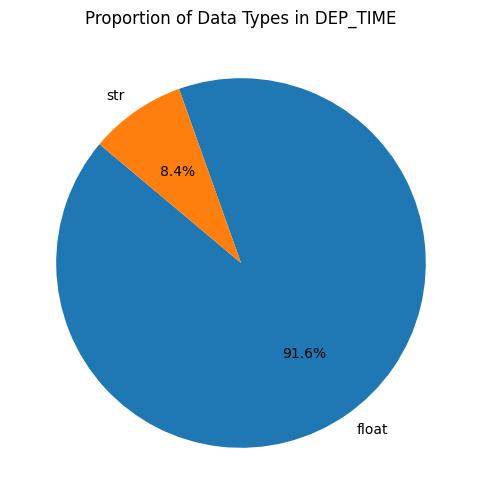

In [24]:
def get_type(value):
    return type(value).__name__

type_series = df['DEP_TIME'].apply(get_type)

type_proportions = type_series.value_counts(normalize=True)

plt.figure(figsize=(8, 6))
type_proportions.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Data Types in DEP_TIME')
plt.ylabel('')
plt.show()

del type_series


In [28]:
float_only = filter_by_type(df, 'DEP_TIME', float)

max_ = float_only['DEP_TIME'].max()
min_ = float_only['DEP_TIME'].min()
print(f"MAX: {max_}")        
print(f"MIN: {min_}")

del float_only


MAX: 2400.0
MIN: 1.0


In [29]:

str_only = filter_by_type(df, 'DEP_TIME', str)

str_to_int = str_only['DEP_TIME'].astype(float).astype(int)

max_ = str_to_int.max()
min_ = str_to_int.min()
print(f"MAX: {max_}")
print(f"MIN: {min_}")

del str_to_int
del str_only

MAX: 2400
MIN: 1


### !DEP_TIME str and float to int

In [30]:
df['DEP_TIME'] = df['DEP_TIME'].astype(float)
### ----->

In [31]:
df['DEP_TIME'].max()

2400.0

In [32]:
df['DEP_TIME'].min()

1.0

In [33]:
df['DEP_TIME'].isna().sum()


63538

In [34]:
df['DEP_TIME'].dtype

dtype('float64')

In [35]:
df['DEP_TIME'] = df['DEP_TIME'].astype('Int64')
df['DEP_TIME'].dtype

Int64Dtype()

In [36]:
df['DEP_TIME'].isna().sum()



63538

In [37]:
df['DEP_TIME'].head(10)

0    1057
1    1056
2    1055
3    1102
4    1240
5    1107
6    1059
7    1055
8    1058
9    1056
Name: DEP_TIME, dtype: Int64

In [38]:
df['DEP_TIME'].max()

2400

In [39]:
df['DEP_TIME'].min()

1

### DEP_DELAY


In [40]:
df['DEP_DELAY'].isna().sum(),

(63538,)

In [41]:
df['DEP_DELAY'].dtypes

dtype('float64')

In [42]:
df['DEP_DELAY'].head(10)

0     -3.0
1     -4.0
2     -5.0
3      2.0
4    100.0
5      7.0
6     -1.0
7     -5.0
8     -2.0
9     -4.0
Name: DEP_DELAY, dtype: float64

In [47]:
print(df['DEP_DELAY'].max())    
print(df['DEP_DELAY'].min())    


2149.0
-204.0


### ! DEP_DELAY float to int

In [50]:
df['DEP_DELAY'] = df['DEP_DELAY'].astype('Int64')

In [51]:
print(df['DEP_DELAY'].max())    
print(df['DEP_DELAY'].min())    

2149
-204


### ! Drop DEP_DELAY_NEW, ARR_DELAY_NEW, DEP_DEL15, ARR_DEL15'

In [54]:
print(df['DEP_DELAY_NEW'].max())    
print(df['DEP_DELAY_NEW'].min())    

2149.0
0.0


In [57]:
columns_to_drop = ['DEP_DELAY_NEW', 'ARR_DELAY_NEW', 'DEP_DEL15', 'ARR_DEL15']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)


### ! Drop few nan

In [64]:
columns_to_check = ['CRS_ARR_TIME', 'ARR_TIME_BLK', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP']
df.dropna(subset=columns_to_check, inplace=True)

### DEP_DELAY_GROUP

In [58]:
df['DEP_DELAY_GROUP']


0         -1.0
1         -1.0
2         -1.0
3          0.0
4          6.0
          ... 
5635973   -1.0
5635974    0.0
5635975   -1.0
5635976   -1.0
5635977   -1.0
Name: DEP_DELAY_GROUP, Length: 5635975, dtype: float64

In [59]:
print(df['DEP_DELAY_GROUP'].max())    
print(df['DEP_DELAY_GROUP'].min())    


12.0
-2.0


### ! DEP_DELAY_GROUP float to int

In [60]:
df['DEP_DELAY_GROUP'] = df['DEP_DELAY_GROUP'].astype('Int64')

In [61]:
print(df['DEP_DELAY_GROUP'].max())    
print(df['DEP_DELAY_GROUP'].min())    


12
-2


### DEP_TIME_BLK

In [69]:
df['DEP_TIME_BLK'].dtype

dtype('O')

In [72]:
type_series = df['DEP_TIME_BLK'].apply(get_type)
type_series.unique()


array(['str'], dtype=object)

In [67]:
df['DEP_TIME_BLK'].nunique()


19

In [68]:
df['DEP_TIME_BLK'].unique()

array(['1100-1159', '1500-1559', '0700-0759', '0600-0659', '1800-1859',
       '1400-1459', '1700-1759', '1600-1659', '1300-1359', '1000-1059',
       '2000-2059', '0900-0959', '1900-1959', '1200-1259', '2200-2259',
       '0800-0859', '2300-2359', '2100-2159', '0001-0559'], dtype=object)

### ! DEP_TIME_BLK drop column

In [274]:

if 'DEP_TIME_BLK' in df.columns:
    df.drop(columns=['DEP_TIME_BLK'], inplace=True)

### TAXI_OUT

In [75]:
type_series = df['TAXI_OUT'].apply(get_type)
type_series.unique()

array(['float', 'str'], dtype=object)

In [76]:
df['TAXI_OUT'].nunique()

323

In [78]:
df['TAXI_OUT'].unique()

array([15.0, 14.0, 21.0, 13.0, 20.0, 11.0, 12.0, 18.0, 24.0, 23.0, 17.0,
       9.0, 16.0, 42.0, 19.0, 34.0, 10.0, 28.0, 33.0, 22.0, 27.0, 30.0,
       nan, 25.0, 32.0, 40.0, 29.0, 45.0, 36.0, 46.0, 39.0, 26.0, 37.0,
       8.0, 7.0, 31.0, 38.0, 41.0, 35.0, 58.0, 61.0, 44.0, 43.0, 75.0,
       59.0, 48.0, 47.0, 86.0, 65.0, 53.0, 55.0, 49.0, 60.0, 66.0, 97.0,
       57.0, 52.0, 105.0, 84.0, 51.0, 71.0, 73.0, 56.0, 79.0, 62.0, 67.0,
       50.0, 54.0, 121.0, 6.0, 70.0, 63.0, 83.0, 68.0, 81.0, 64.0, 72.0,
       139.0, 69.0, 89.0, 5.0, 78.0, 74.0, 77.0, 87.0, 76.0, 98.0, 106.0,
       128.0, 109.0, 111.0, 118.0, 82.0, 95.0, 93.0, 94.0, 88.0, 91.0,
       124.0, 85.0, 80.0, 99.0, 102.0, 90.0, 96.0, 104.0, 1.0, 131.0,
       132.0, 107.0, 103.0, 101.0, 112.0, 137.0, 4.0, 110.0, 126.0, 158.0,
       3.0, 2.0, 135.0, 92.0, 141.0, 130.0, 120.0, 114.0, 119.0, 129.0,
       122.0, 108.0, 156.0, 125.0, 140.0, 115.0, 100.0, 138.0, 113.0,
       133.0, 134.0, 117.0, 147.0, 123.0, 146.0, 143.0, 148.

In [79]:
float_only = filter_by_type(df, 'TAXI_OUT', float)

max_ = float_only['TAXI_OUT'].max()
min_ = float_only['TAXI_OUT'].min()
print(f"MAX: {max_}")        
print(f"MIN: {min_}")

del float_only


MAX: 186.0
MIN: 1.0


In [80]:
str_only = filter_by_type(df, 'TAXI_OUT', str)

str_to_int = str_only['TAXI_OUT'].astype(float).astype(int)

max_ = str_to_int.max()
min_ = str_to_int.min()
print(f"MAX: {max_}")
print(f"MIN: {min_}")

del str_to_int
del str_only

MAX: 158
MIN: 1


### ! TAXI_OUT str and float to int

In [86]:
df['TAXI_OUT'] = df['TAXI_OUT'].astype(float)
df['TAXI_OUT'] = df['TAXI_OUT'].astype('Int64')
df['TAXI_OUT'].dtype


Int64Dtype()

In [88]:
print(f"MAX: {df['TAXI_OUT'].max()}")
print(f"MAX: {df['TAXI_OUT'].min()}")


MAX: 186
MAX: 1


### WHEELS_OFF

In [90]:
df['WHEELS_OFF'].nunique()


1440

In [91]:
df['WHEELS_OFF'].dtype


dtype('float64')

In [93]:
df['WHEELS_OFF']


0          1112.0
1          1110.0
2          1116.0
3          1115.0
4          1300.0
            ...  
5635973     758.0
5635974    1338.0
5635975     708.0
5635976    1229.0
5635977     807.0
Name: WHEELS_OFF, Length: 5635967, dtype: float64

### ! WHEELS_OFF float to int

In [95]:
df['WHEELS_OFF'] = df['WHEELS_OFF'].astype(float)
df['WHEELS_OFF'] = df['WHEELS_OFF'].astype('Int64')
df['WHEELS_OFF'].dtype


Int64Dtype()

### WHEELS_ON

In [96]:
df['WHEELS_ON'].nunique()


1440

In [98]:
df['WHEELS_ON']



0          1424.0
1          1416.0
2          1431.0
3          1424.0
4          1617.0
            ...  
5635973     807.0
5635974    1351.0
5635975    1051.0
5635976    1227.0
5635977     806.0
Name: WHEELS_ON, Length: 5635967, dtype: float64

In [99]:
df['WHEELS_ON'].dtype


dtype('float64')

### ! WHEELS_ON float to int


In [100]:
df['WHEELS_ON'] = df['WHEELS_ON'].astype(float)
df['WHEELS_ON'] = df['WHEELS_ON'].astype('Int64')
df['WHEELS_ON'].dtype


Int64Dtype()

### WHEELS_OFF and WHEELS_ON 

In [103]:
df[['WHEELS_ON', 'WHEELS_OFF']].drop_duplicates()

,WHEELS_ON,WHEELS_OFF
0,1424,1112
1,1416,1110
2,1431,1116
3,1424,1115
4,1617,1300
...,...,...
5635410,2224,1857
5635653,1909,1403
5635754,1521,752
5635797,1743,1257


### TAXI_IN


In [104]:
df['TAXI_IN'].dtype



dtype('float64')

In [106]:
df['TAXI_IN'].nunique()


193

In [107]:
df['TAXI_IN'].unique()


array([  8.,  10.,  14.,   9.,  12.,  11.,   7.,   6.,   4.,  13.,  16.,
         5.,  15.,  18.,  17.,  nan,  41.,  19.,  26.,  35.,   3.,  22.,
         2.,  34.,  20.,  43.,  23.,  30.,  28.,  68.,  61.,  42.,  25.,
        27.,  49.,  74.,  21.,  38.,  37.,  65.,  36.,  33.,  31.,  45.,
        57.,  24.,  32.,  47.,  59.,  46.,  62.,  44.,  29., 101.,  40.,
        54.,  48.,  52.,  51.,  77.,  56.,  67.,  50.,  78.,  76.,   1.,
        63.,  39.,  81.,  58., 104.,  66.,  53.,  79.,  55.,  86.,  75.,
        72.,  70.,  96.,  60.,  95.,  87.,  71.,  64., 123.,  83.,  99.,
        82., 121., 127.,  73.,  80.,  69.,  91.,  94.,  89.,  84.,  92.,
       100.,  85., 107., 147., 111., 102., 142., 109., 114., 120., 155.,
       117.,  97.,  93.,  98., 110., 103., 138., 124., 108., 105., 118.,
       133., 134., 115., 116.,  88., 131.,  90., 157., 113., 126., 112.,
       119., 130., 122., 132., 137., 167., 158., 106., 125., 145., 178.,
       183., 152., 129., 136., 176., 247., 128., 16

### ! TAXI_IN float to int


In [109]:
df['TAXI_IN'] = df['TAXI_IN'].astype(float)
df['TAXI_IN'] = df['TAXI_IN'].astype('Int64')
df['TAXI_IN'].dtype


Int64Dtype()

### CRS_ARR_TIME



In [111]:
df['CRS_ARR_TIME'].dtype

dtype('float64')

In [112]:
df['CRS_ARR_TIME'].nunique()


1439

In [114]:
df['CRS_ARR_TIME']


0          1438.0
1          1438.0
2          1438.0
3          1438.0
4          1438.0
            ...  
5635973     830.0
5635974    1355.0
5635975    1125.0
5635976    1235.0
5635977     820.0
Name: CRS_ARR_TIME, Length: 5635967, dtype: float64

In [115]:
print(f"MAX: {df['CRS_ARR_TIME'].max()}")
print(f"MAX: {df['CRS_ARR_TIME'].min()}")


MAX: 2400.0
MAX: 1.0


### ! CRS_ARR_TIME float to int


In [117]:
df['CRS_ARR_TIME'] = df['CRS_ARR_TIME'].astype(float)
df['CRS_ARR_TIME'] = df['CRS_ARR_TIME'].astype('Int64')
df['CRS_ARR_TIME'].dtype


Int64Dtype()

In [118]:
print(f"MAX: {df['CRS_ARR_TIME'].max()}")
print(f"MIX: {df['CRS_ARR_TIME'].min()}")


MAX: 2400
MAX: 1


### ARR_TIME



In [119]:
df['ARR_TIME'].dtype


dtype('O')

In [121]:
df['ARR_TIME'].apply(get_type).unique()


array(['float', 'str'], dtype=object)

In [124]:
df['ARR_TIME'].nunique()


2880

In [122]:
float_only = filter_by_type(df, 'ARR_TIME', float)

max_ = float_only['ARR_TIME'].max()
min_ = float_only['ARR_TIME'].min()
print(f"MAX: {max_}")        
print(f"MIN: {min_}")

del float_only

MAX: 2400.0
MIN: 1.0


In [123]:


str_only = filter_by_type(df, 'ARR_TIME', str)

str_to_int = str_only['ARR_TIME'].astype(float).astype(int)

max_ = str_to_int.max()
min_ = str_to_int.min()
print(f"MAX: {max_}")
print(f"MIN: {min_}")

del str_to_int
del str_only

MAX: 2400
MIN: 1


In [125]:
df['ARR_TIME']

0          1432.0
1          1426.0
2          1445.0
3          1433.0
4          1631.0
            ...  
5635973     817.0
5635974    1404.0
5635975    1055.0
5635976    1231.0
5635977     811.0
Name: ARR_TIME, Length: 5635967, dtype: object

### ! ARR_TIME float and str to int


In [126]:
df['ARR_TIME'] = df['ARR_TIME'].astype(float)
df['ARR_TIME'] = df['ARR_TIME'].astype('Int64')
df['ARR_TIME'].dtype

Int64Dtype()

In [127]:
df['ARR_TIME'].nunique()

1440

In [128]:
df['ARR_TIME']



0          1432
1          1426
2          1445
3          1433
4          1631
           ... 
5635973     817
5635974    1404
5635975    1055
5635976    1231
5635977     811
Name: ARR_TIME, Length: 5635967, dtype: Int64

### ARR_DELAY

In [133]:
df['ARR_DELAY'].dtype


dtype('float64')

In [129]:
df['ARR_DELAY']


0           -6.0
1          -12.0
2            7.0
3           -5.0
4          113.0
           ...  
5635973    -13.0
5635974      9.0
5635975    -30.0
5635976     -4.0
5635977     -9.0
Name: ARR_DELAY, Length: 5635967, dtype: float64

In [130]:
df['ARR_DELAY'].nunique()


1386

In [131]:
df['ARR_DELAY'].unique()


array([  -6.,  -12.,    7., ...,  813.,  997., 1145.])

In [132]:
print(f"MAX: {df['ARR_DELAY'].max()}")
print(f"MIX: {df['ARR_DELAY'].min()}")


MAX: 2142.0
MAX: -152.0


In [135]:
df['ARR_DELAY'] = df['ARR_DELAY'].astype(float)
df['ARR_DELAY'] = df['ARR_DELAY'].astype('Int64')
df['ARR_DELAY'].dtype


Int64Dtype()

### ! ARR_DELAY float to int

In [136]:
print(f"MAX: {df['ARR_DELAY'].max()}")
print(f"MIX: {df['ARR_DELAY'].min()}")


MAX: 2142
MIX: -152


### ARR_DELAY_GROUP

In [137]:
df['ARR_DELAY_GROUP'].dtype


dtype('float64')

In [138]:
df['ARR_DELAY_GROUP'].nunique()


15

In [139]:
df['ARR_DELAY_GROUP'].unique()


array([-1.,  0.,  7.,  1., -2.,  4.,  2., nan, 12.,  3.,  6.,  5.,  8.,
       10.,  9., 11.])

### ! ARR_DELAY_GROUP float to int

In [140]:
df['ARR_DELAY_GROUP'] = df['ARR_DELAY_GROUP'].astype(float)
df['ARR_DELAY_GROUP'] = df['ARR_DELAY_GROUP'].astype('Int64')
df['ARR_DELAY_GROUP'].dtype

Int64Dtype()

In [141]:
df['ARR_DELAY_GROUP'].unique()


<IntegerArray>
[-1, 0, 7, 1, -2, 4, 2, <NA>, 12, 3, 6, 5, 8, 10, 9, 11]
Length: 16, dtype: Int64

In [142]:
df.isna().sum()

FL_DATE                        0
AIRLINE_ID                     0
CARRIER                        0
TAIL_NUM                   12750
FL_NUM                         0
ORIGIN_AIRPORT_ID              0
ORIGIN_AIRPORT_SEQ_ID          0
ORIGIN_CITY_MARKET_ID          0
ORIGIN                         0
ORIGIN_CITY_NAME               0
ORIGIN_STATE_ABR               0
ORIGIN_STATE_FIPS              0
ORIGIN_STATE_NM                0
ORIGIN_WAC                     0
DEST_AIRPORT_ID                0
DEST_AIRPORT_SEQ_ID            0
DEST_CITY_MARKET_ID            0
DEST                           0
DEST_CITY_NAME                 0
DEST_STATE_ABR                 0
DEST_STATE_FIPS                0
DEST_STATE_NM                  0
DEST_WAC                       0
CRS_DEP_TIME                   0
DEP_TIME                   63538
DEP_DELAY                  63538
DEP_DELAY_GROUP            63538
DEP_TIME_BLK                   0
TAXI_OUT                   65521
WHEELS_OFF                 65521
WHEELS_ON 

In [144]:
df.dtypes

FL_DATE                  datetime64[ns]
AIRLINE_ID                        int64
CARRIER                          object
TAIL_NUM                         object
FL_NUM                            int64
ORIGIN_AIRPORT_ID                 int64
ORIGIN_AIRPORT_SEQ_ID             int64
ORIGIN_CITY_MARKET_ID             int64
ORIGIN                           object
ORIGIN_CITY_NAME                 object
ORIGIN_STATE_ABR                 object
ORIGIN_STATE_FIPS                 int64
ORIGIN_STATE_NM                  object
ORIGIN_WAC                        int64
DEST_AIRPORT_ID                   int64
DEST_AIRPORT_SEQ_ID               int64
DEST_CITY_MARKET_ID               int64
DEST                             object
DEST_CITY_NAME                   object
DEST_STATE_ABR                   object
DEST_STATE_FIPS                   int64
DEST_STATE_NM                    object
DEST_WAC                          int64
CRS_DEP_TIME                      int64
DEP_TIME                          Int64



### ARR_TIME_BLK


In [146]:
df['ARR_TIME_BLK'].dtypes

dtype('O')

In [148]:
df['ARR_TIME_BLK'].nunique()

19

In [149]:
df['ARR_TIME_BLK'].unique()

array(['1400-1459', '1700-1759', '1600-1659', '1500-1559', '2100-2159',
       '2000-2059', '1800-1859', '1900-1959', '2200-2259', '2300-2359',
       '1200-1259', '1300-1359', '0001-0559', '1100-1159', '1000-1059',
       '0700-0759', '0600-0659', '0900-0959', '0800-0859'], dtype=object)

In [153]:
df[[col for col in df.columns if col.startswith('ARR_')]].drop_duplicates()

,ARR_TIME,ARR_DELAY,ARR_DELAY_GROUP,ARR_TIME_BLK
0,1432,-6,-1,1400-1459
1,1426,-12,-1,1400-1459
2,1445,7,0,1400-1459
3,1433,-5,-1,1400-1459
4,1631,113,7,1400-1459
...,...,...,...,...
5633097,134,159,10,2200-2259
5633178,158,163,10,2300-2359
5634639,1849,219,12,1500-1559
5634643,1237,142,9,1000-1059


### ! ARR_TIME_BLK drop column

In [273]:

if 'ARR_TIME_BLK' in df.columns:
    df.drop(columns=['ARR_TIME_BLK'], inplace=True)

### CANCELLED

In [154]:
df['CANCELLED'].dtypes

dtype('float64')

In [155]:
df['CANCELLED'].nunique()

2

In [156]:
df['CANCELLED'].unique()

array([0., 1.])

### ! CANCELLED float to int

In [162]:
df['CANCELLATION'] = df['CANCELLED'].astype(int)
df['CANCELLATION'].dtype

dtype('int64')

### CANCELLATION_CODE

In [164]:
df['CANCELLATION_CODE'].dtypes

dtype('O')

In [167]:
df['CANCELLATION_CODE'].apply(get_type).unique()

array(['float', 'str'], dtype=object)

In [168]:
df['CANCELLATION_CODE'].nunique()

4

In [169]:
df['CANCELLATION_CODE'].unique()

array([nan, 'A', 'B', 'C', 'D'], dtype=object)

In [172]:
df['CANCELLATION_CODE'].count() / df['CANCELLATION_CODE'].isna().sum() * 100

1.184326750448833

### ! DROP CANCELLATION_CODE column

In [173]:

if 'CANCELLATION_CODE' in df.columns:
    df.drop(columns=['CANCELLATION_CODE'], inplace=True)

### DIVERTED

In [176]:
df['DIVERTED'].dtypes

dtype('float64')

In [177]:
df['DIVERTED'].nunique()

2

In [178]:
df['DIVERTED'].unique()

array([0., 1.])

### ! DIVERTED float to int

In [180]:
df['DIVERTED'] = df['DIVERTED'].astype(int)
df['DIVERTED'].dtype

dtype('int64')

### CRS_ELAPSED_TIME

In [181]:
df['CRS_ELAPSED_TIME'].dtypes

dtype('float64')

In [185]:
df['CRS_ELAPSED_TIME'].nunique()

575

In [186]:
df['CRS_ELAPSED_TIME'].unique()

array([158., 191., 187., 317., 321., 385., 382., 258., 284., 280., 148.,
       149., 120., 114.,  97.,  99., 295., 159., 153., 183., 185., 236.,
       234., 271., 281., 311., 312., 358., 363., 165., 163., 196., 201.,
       205., 202., 142., 178., 180., 182., 170., 171., 175., 166., 204.,
       212., 211., 215., 216., 262., 264., 268., 294., 291., 297., 357.,
       177.,  77.,  75.,  78.,  76., 186., 181., 155., 156., 168., 129.,
       132., 241., 189., 130., 199., 194., 206., 200., 323., 327.,  98.,
       402., 184., 167., 169., 203., 328., 318.,  84.,  81.,  88.,  93.,
       359., 313., 267., 266.,  89., 244., 240.,  68., 208., 176., 408.,
       410., 219., 209., 394., 330., 329., 378., 384., 516., 524.,  66.,
        69., 427., 430., 509., 514., 443., 439., 446., 403., 395., 309.,
       314., 337., 335., 307., 303., 400., 405., 332., 399., 197., 230.,
       375., 380., 326., 393., 389., 390., 336., 239., 238., 316., 190.,
       188., 364., 373., 319., 324., 147., 237., 19

### ! CRS_ELAPSED_TIME float to int

In [188]:
df['CRS_ELAPSED_TIME'] = df['CRS_ELAPSED_TIME'].astype(int)
df['CRS_ELAPSED_TIME'].dtype

dtype('int64')

### ACTUAL_ELAPSED_TIME

In [191]:
df['ACTUAL_ELAPSED_TIME'].dtypes

dtype('float64')

In [193]:
df['ACTUAL_ELAPSED_TIME'].nunique()

716

In [198]:
df['ACTUAL_ELAPSED_TIME'].unique()

array([155., 150., 170., 151., 171., 148., 159., 156., 158., 147., 162.,
       161., 168., 145., 143., 173., 157., 152., 197., 169., 180., 166.,
       187., 174., 183., 164., 178., 167., 191., 201., 203., 181., 176.,
       193., 329., 336., 304., 314., 316., 315., 318., 326., 333., 360.,
       310., 302., 300., 312.,  nan, 298., 309., 306., 308., 299., 366.,
       377., 410., 376., 358., 355., 357., 344., 356., 353., 388., 408.,
       404., 396., 387., 373., 389., 380., 365., 386., 382., 378., 362.,
       246., 270., 248., 261., 260., 271., 254., 262., 267., 258., 290.,
       275., 274., 273., 285., 284., 281., 264., 253., 255., 266., 277.,
       286., 136., 133., 129., 128., 139., 127., 146., 137., 125., 142.,
       131., 141., 134., 149., 140., 153., 111.,  91.,  97., 110., 106.,
       105., 108.,  98., 101., 120.,  93., 116., 102., 114., 115.,  96.,
        99.,  92.,  86., 100.,  95., 109.,  89.,  88.,  87.,  80.,  90.,
       317., 292., 282., 288., 293., 291., 289., 27

In [197]:
print(f"MAX: {df['ACTUAL_ELAPSED_TIME'].max()}")
print(f"MIX: {df['ACTUAL_ELAPSED_TIME'].min()}")


MAX: 778.0
MIX: 14.0


### ! ACTUAL_ELAPSED_TIME float to int

In [204]:
df['ACTUAL_ELAPSED_TIME'] = df['ACTUAL_ELAPSED_TIME'].astype('Int64')
df['ARR_DELAY'].dtype



Int64Dtype()

In [203]:
print(f"MAX: {df['ACTUAL_ELAPSED_TIME'].max()}")
print(f"MIX: {df['ACTUAL_ELAPSED_TIME'].min()}")

MAX: 778
MIX: 14


In [208]:
# pd.DataFrame(df['ACTUAL_ELAPSED_TIME'].unique()).head(60)

### AIR_TIME

In [210]:
df['AIR_TIME'].dtypes

dtype('float64')

In [211]:
df['AIR_TIME'].nunique()


692

In [213]:
df['AIR_TIME'].unique()

array([132., 126., 135., 129., 137., 128., 136., 130., 133., 118., 138.,
       123., 131., 141., 121., 119., 147., 149., 146., 145., 142., 144.,
       157., 155., 143., 139., 150., 158., 156., 151., 161., 165., 294.,
       292., 277., 296., 297., 295., 288., 335., 287., 283., 274., 285.,
        nan, 281., 273., 282., 280., 324., 334., 337., 326., 327., 323.,
       314., 317., 320., 355., 378., 362., 350., 333., 343., 344., 354.,
       340., 357., 342., 339., 220., 225., 222., 245., 244., 235., 251.,
       239., 234., 246., 240., 247., 255., 256., 242., 258., 257., 266.,
       262., 248., 227., 232., 259., 275., 260., 109., 108.,  99., 114.,
       105., 106., 104., 112., 115., 111., 107., 117., 116.,  91.,  78.,
        81.,  85.,  88.,  89.,  86.,  80.,  83.,  87.,  75.,  94.,  84.,
        98.,  79.,  92.,  97.,  82.,  93.,  76.,  77.,  72.,  71.,  68.,
        70.,  73., 253., 252., 270., 264., 261., 265., 269., 267., 263.,
       271., 268., 278., 279., 243., 140., 124., 13

### ! AIR_TIME float to int

In [216]:
df['AIR_TIME'] = df['AIR_TIME'].astype('Int64')
df['AIR_TIME'].dtype

Int64Dtype()

In [217]:
print(f"MAX: {df['AIR_TIME'].max()}")
print(f"MIX: {df['AIR_TIME'].min()}")


MAX: 723
MIX: 4


### FLIGHTS

In [248]:
df['FLIGHTS'].dtype

dtype('float64')

In [251]:
df['FLIGHTS'].nunique()


1

In [252]:
df['FLIGHTS'].unique()


array([1.])

### ! FLIGHTS drop column

In [255]:
if 'FLIGHTS' in df.columns:
    df.drop(columns=['FLIGHTS'], inplace=True)


### DISTANCE

In [256]:
df['DISTANCE'].dtype

dtype('float64')

In [257]:
df['DISTANCE'].nunique()


1364

In [258]:
df['DISTANCE']

0           986.0
1           986.0
2           986.0
3           986.0
4           986.0
            ...  
5635973     451.0
5635974     451.0
5635975    1440.0
5635976     368.0
5635977     368.0
Name: DISTANCE, Length: 5635967, dtype: float64

### ! DISTANCE float to int

In [259]:
df['AIR_TIME'] = df['AIR_TIME'].astype('Int64')
df['AIR_TIME'].dtype

Int64Dtype()

### DISTANCE_GROUP

In [260]:
df['DISTANCE_GROUP']

0          4.0
1          4.0
2          4.0
3          4.0
4          4.0
          ... 
5635973    2.0
5635974    2.0
5635975    6.0
5635976    2.0
5635977    2.0
Name: DISTANCE_GROUP, Length: 5635967, dtype: float64

In [262]:
df['DISTANCE_GROUP'].dtype

dtype('float64')

In [264]:
df['DISTANCE_GROUP'].nunique()

11

In [265]:
df['DISTANCE_GROUP'].unique()

array([ 4., 10.,  8.,  3.,  5.,  7., 11.,  1.,  2.,  9.,  6.])



### ! DISTANCE_GROUP float to int

In [267]:
df['DISTANCE_GROUP'] = df['DISTANCE_GROUP'].astype('Int64')
df['DISTANCE_GROUP'].dtype

Int64Dtype()

In [271]:
df[['DISTANCE', 'DISTANCE_GROUP']].drop_duplicates().head(40)

,DISTANCE,DISTANCE_GROUP
0,986.0,4
57,2422.0,10
119,1829.0,8
153,868.0,4
184,550.0,3
239,2311.0,10
270,1012.0,5
301,1005.0,5
332,1709.0,7
394,2504.0,11


### CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, FIRST_DEP_TIME, TOTAL_ADD_GTIME, LONGEST_ADD_GTIME

In [218]:
df[['FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME', 'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME']]

,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME
0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,986.0,4.0,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5635973,1.0,451.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5635974,1.0,451.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5635975,1.0,1440.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5635976,1.0,368.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
df[['FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME', 'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME']].dtypes

FLIGHTS                float64
DISTANCE               float64
DISTANCE_GROUP         float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
FIRST_DEP_TIME         float64
TOTAL_ADD_GTIME        float64
LONGEST_ADD_GTIME      float64
dtype: object

In [222]:
df[['FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME', 'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME']].isna().sum()

FLIGHTS                      0
DISTANCE                     0
DISTANCE_GROUP               0
CARRIER_DELAY          4667527
WEATHER_DELAY          4667527
NAS_DELAY              4667527
SECURITY_DELAY         4667527
LATE_AIRCRAFT_DELAY    4667527
FIRST_DEP_TIME         5601434
TOTAL_ADD_GTIME        5601434
LONGEST_ADD_GTIME      5601434
dtype: int64

In [225]:
print(df['CARRIER_DELAY'].nunique())
print(f"MAX: {df['CARRIER_DELAY'].max()}")
print(f"MIN: {df['CARRIER_DELAY'].min()}")

1207
MAX: 2142.0
MIX: 0.0


In [227]:
print(df['WEATHER_DELAY'].nunique())
print(f"MAX: {df['WEATHER_DELAY'].max()}")
print(f"MIN: {df['WEATHER_DELAY'].min()}")


688
MAX: 1157.0
MIX: 0.0


In [228]:
print(df['NAS_DELAY'].nunique())
print(f"MAX: {df['NAS_DELAY'].max()}")
print(f"MIN: {df['NAS_DELAY'].min()}")


608
MAX: 1446.0
MIX: 0.0


In [229]:
print(df['SECURITY_DELAY'].nunique())
print(f"MAX: {df['SECURITY_DELAY'].max()}")
print(f"MIN: {df['SECURITY_DELAY'].min()}")


172
MAX: 474.0
MIX: 0.0


In [230]:
df['SECURITY_DELAY'].unique()

array([ nan,   0.,  24.,   1.,  96.,   5.,  14.,  23.,  49.,  16.,  13.,
         8.,   3.,  12.,  20.,   4.,  30.,   6.,  15.,  21.,  42.,   2.,
        50.,  32.,  34.,  11.,   7.,   9., 242.,  28.,  48.,  53.,  10.,
        18.,  55.,  73.,  59., 115.,  19.,  60.,  79.,  33.,  29.,  39.,
       125.,  26.,  17.,  25.,  22.,  36., 233.,  38., 123.,  77.,  54.,
        35., 116.,  40.,  74., 179.,  80., 110.,  85.,  56.,  44.,  45.,
        41.,  43., 108.,  27.,  86., 124., 109.,  57.,  47., 164.,  31.,
        78.,  81., 114.,  98.,  37.,  65.,  61., 474., 100.,  87.,  58.,
        52., 210.,  67.,  72.,  63.,  90.,  46., 118., 222.,  68.,  76.,
        71.,  89., 101., 232., 145.,  92.,  62., 206., 182., 138., 128.,
       146., 207.,  82.,  97., 132., 161., 152., 134., 184., 167., 129.,
       166., 141., 126., 180., 158., 119., 142.,  64.,  69., 140., 163.,
       120., 105.,  51., 135.,  93., 104., 136., 162.,  70., 151., 107.,
        75., 173.,  91.,  94.,  84., 127., 170., 28

In [231]:
print(df['LATE_AIRCRAFT_DELAY'].nunique())
print(f"MAX: {df['LATE_AIRCRAFT_DELAY'].max()}")
print(f"MIN: {df['LATE_AIRCRAFT_DELAY'].min()}")


749
MAX: 1484.0
MIX: 0.0


In [232]:
print(df['FIRST_DEP_TIME'].nunique())
print(f"MAX: {df['FIRST_DEP_TIME'].max()}")
print(f"MIN: {df['FIRST_DEP_TIME'].min()}")


1293
MAX: 2400.0
MIX: 1.0


In [233]:
print(df['TOTAL_ADD_GTIME'].nunique())
print(f"MAX: {df['TOTAL_ADD_GTIME'].max()}")
print(f"MIN: {df['TOTAL_ADD_GTIME'].min()}")



235
MAX: 335.0
MIN: 1.0


In [234]:
print(df['LONGEST_ADD_GTIME'].nunique())
print(f"MAX: {df['LONGEST_ADD_GTIME'].max()}")
print(f"MIN: {df['LONGEST_ADD_GTIME'].min()}")




202
MAX: 265.0
MIN: 1.0


In [236]:
df['LONGEST_ADD_GTIME'].count() / df['LONGEST_ADD_GTIME'].isna().sum() * 100

0.6165028455213434

In [237]:
df['CARRIER_DELAY'].count() / df['CARRIER_DELAY'].isna().sum() * 100

20.748460587373142

In [243]:
df[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY']].dropna()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY
4,0.0,0.0,47.0,0.0
15,0.0,21.0,0.0,0.0
22,0.0,0.0,15.0,0.0
24,63.0,0.0,0.0,0.0
26,26.0,0.0,6.0,0.0
...,...,...,...,...
5635923,19.0,0.0,6.0,0.0
5635933,0.0,0.0,0.0,0.0
5635937,51.0,0.0,0.0,0.0
5635946,0.0,0.0,22.0,0.0


In [244]:
cols = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY']

for col in cols:
    df[col] = df[col].astype('Int64')
    

In [245]:
df[cols].dropna()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY
4,0,0,47,0
15,0,21,0,0
22,0,0,15,0
24,63,0,0,0
26,26,0,6,0
...,...,...,...,...
5635923,19,0,6,0
5635933,0,0,0,0
5635937,51,0,0,0
5635946,0,0,22,0


In [246]:
df[cols].isna().sum()

CARRIER_DELAY     4667527
WEATHER_DELAY     4667527
NAS_DELAY         4667527
SECURITY_DELAY    4667527
dtype: int64

In [275]:
df.shape

(5635967, 51)